<a href="https://colab.research.google.com/github/anjithsm/DataScience/blob/main/Preprocessing_on_Loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/train_loan_preprocess.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


## **Finding the missing values and handling the missing values**

In [70]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [71]:
# Filling the columns having categorical values and is null

null_cols = ['Gender', 'Married', 'Self_Employed']
for col in null_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

In [72]:
# Replaced the 3+ in the columns with '3'

df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

In [73]:
for col in ['Dependents','LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
  df[col] = df[col].fillna(df[col].median())

In [74]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [75]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


## **Finding and removing the outliers**

In [76]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

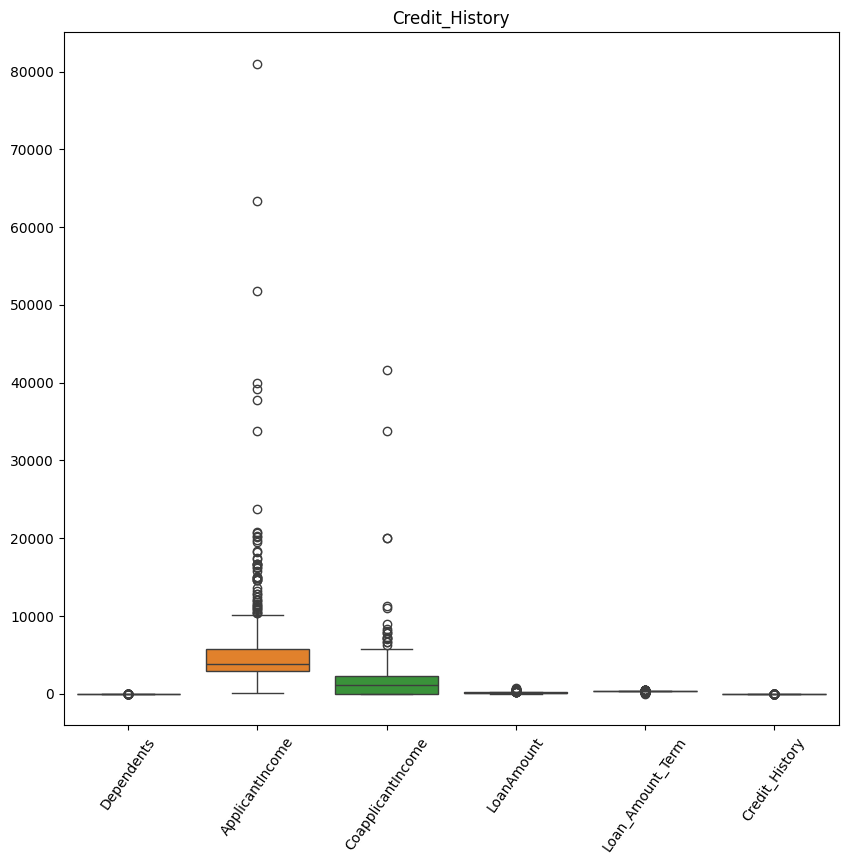

In [77]:
# Boxplot for identifying the outliers

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,9))
sns.boxplot(data = df)
plt.xticks(rotation = 55)
plt.title(col)
plt.show()

In [78]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [79]:
# Removing the outliers using IQR

outliers = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in outliers:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q1 - Q3
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  df[col] = df[col].clip(lower = lower_limit, upper = upper_limit)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

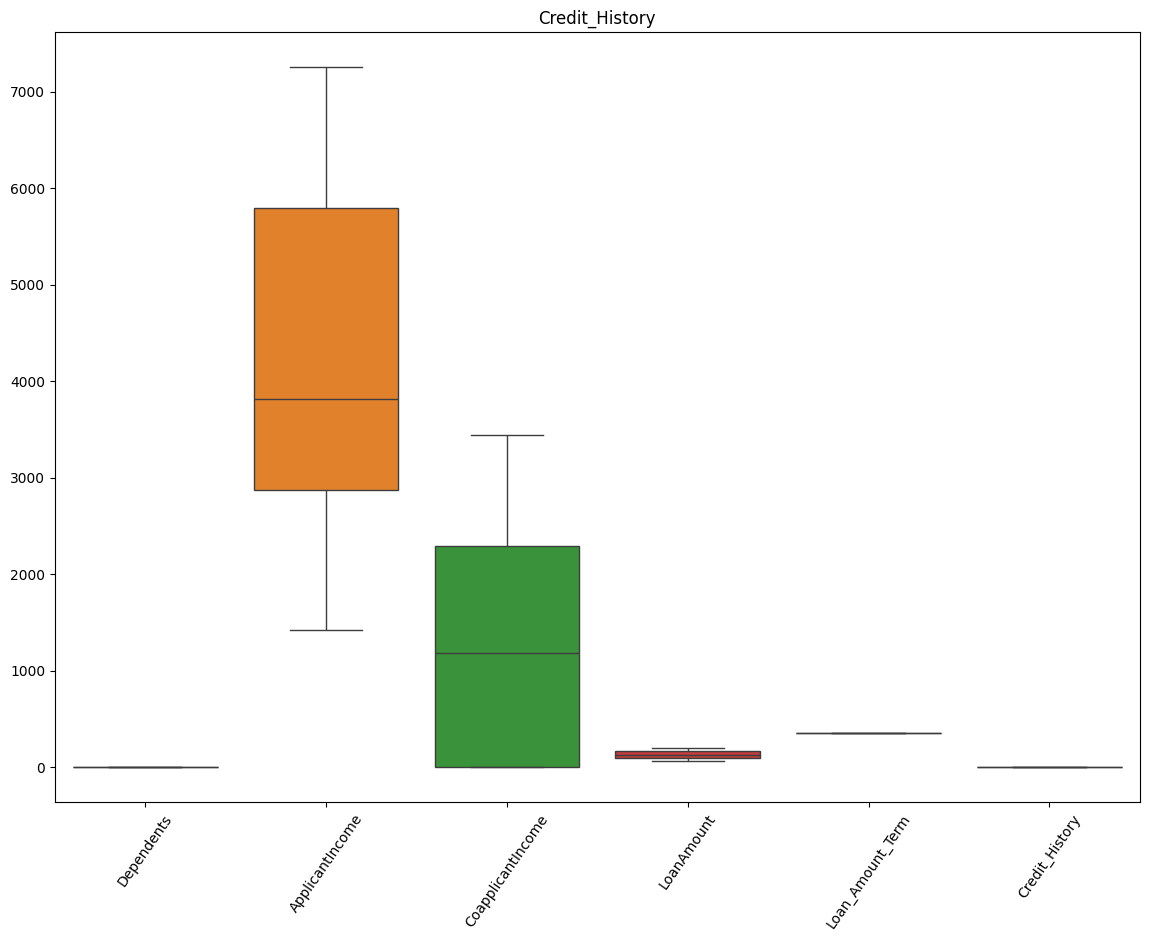

In [80]:
plt.figure(figsize = (14,10))
sns.boxplot(data = df)
plt.xticks(rotation = 55)
plt.title(col)
plt.show()

In [81]:
# Encoding the LoanID

from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
df['LoanID_encoded'] = le.fit_transform(df['Loan_ID'])
df['Self_Employed_encoded'] = le.fit_transform(df['Self_Employed'])
df['Property_Area_encoded'] = le.fit_transform(df['Property_Area'])
df.drop(columns = 'Loan_ID', axis = 1, inplace = True)
df.drop(columns = 'Self_Employed', axis = 1, inplace = True)
df.drop(columns = 'Property_Area', axis = 2, inplace = True)
df

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanID_encoded,Self_Employed_encoded,Property_Area_encoded
0,Male,No,0.0,Graduate,5849.00,0.0,128.0,360.0,1.0,Y,0,0,2
1,Male,Yes,1.0,Graduate,4583.00,1508.0,128.0,360.0,1.0,N,1,0,0
2,Male,Yes,0.0,Graduate,3000.00,0.0,68.0,360.0,1.0,Y,2,1,2
3,Male,Yes,0.0,Not Graduate,2583.00,2358.0,120.0,360.0,1.0,Y,3,0,2
4,Male,No,0.0,Graduate,6000.00,0.0,141.0,360.0,1.0,Y,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,2900.00,0.0,71.0,360.0,1.0,Y,609,0,0
610,Male,Yes,1.5,Graduate,4106.00,0.0,68.0,360.0,1.0,Y,610,0,0
611,Male,Yes,1.0,Graduate,7253.75,240.0,197.0,360.0,1.0,Y,611,0,2
612,Male,Yes,1.5,Graduate,7253.75,0.0,187.0,360.0,1.0,Y,612,0,2


In [83]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area_encoded', 'Self_Employed_encoded']])
df_scaled

array([[ 0.87504722, -0.96979846, -0.10291933, ...,  0.        ,
         1.22329839, -0.39260074],
       [ 0.16881518,  0.18698186, -0.10291933, ...,  0.        ,
        -1.31851281, -0.39260074],
       [-0.71425379, -0.96979846, -1.5713733 , ...,  0.        ,
         1.22329839,  2.54711697],
       ...,
       [ 1.65868028, -0.78569549,  1.58580274, ...,  0.        ,
         1.22329839, -0.39260074],
       [ 1.65868028, -0.96979846,  1.34106041, ...,  0.        ,
         1.22329839, -0.39260074],
       [ 0.16881518, -0.96979846,  0.01945183, ...,  0.        ,
        -0.04760721,  2.54711697]])